In [345]:
import numpy as np
import pandas as pd 

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.columns

In [385]:
df = pd.read_csv('adult.csv')

df.head(4)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


In [387]:
df.shape

(48842, 15)

In [389]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [393]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [395]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [407]:
df.duplicated().sum()

0

In [405]:
df.drop_duplicates(inplace=True)

In [403]:
df.duplicated().sum()

0

In [411]:
df.shape

(48790, 15)

In [413]:
df.count()

age                48790
workclass          48790
fnlwgt             48790
education          48790
educational-num    48790
marital-status     48790
occupation         48790
relationship       48790
race               48790
gender             48790
capital-gain       48790
capital-loss       48790
hours-per-week     48790
native-country     48790
income             48790
dtype: int64

In [421]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [423]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [425]:
df.apply(lambda x: x.unique())

age                [25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 3...
workclass          [Private, Local-gov, ?, Self-emp-not-inc, Fede...
fnlwgt             [226802, 89814, 336951, 160323, 103497, 198693...
education          [11th, HS-grad, Assoc-acdm, Some-college, 10th...
educational-num    [7, 9, 12, 10, 6, 15, 4, 13, 14, 16, 3, 11, 5,...
marital-status     [Never-married, Married-civ-spouse, Widowed, D...
occupation         [Machine-op-inspct, Farming-fishing, Protectiv...
relationship       [Own-child, Husband, Not-in-family, Unmarried,...
race               [Black, White, Asian-Pac-Islander, Other, Amer...
gender                                                [Male, Female]
capital-gain       [0, 7688, 3103, 6418, 7298, 3908, 14084, 5178,...
capital-loss       [0, 1721, 1876, 2415, 1887, 625, 1977, 2057, 1...
hours-per-week     [40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 4...
native-country     [United-States, ?, Peru, Guatemala, Mexico, Do...
income                            

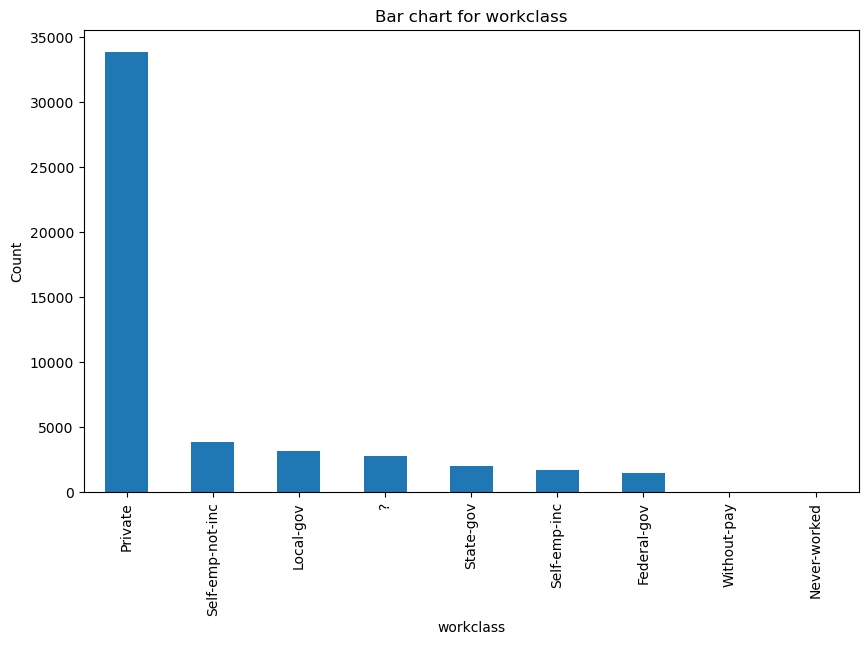

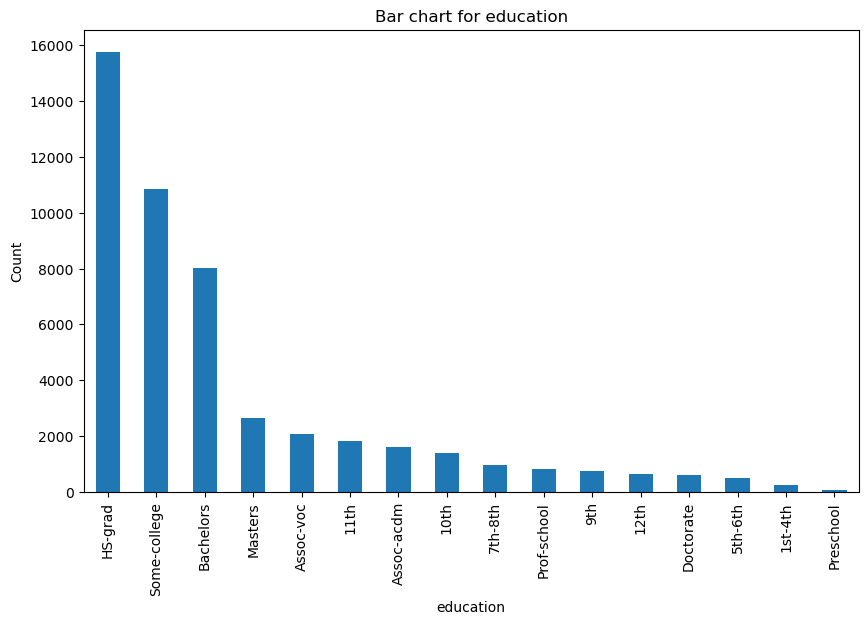

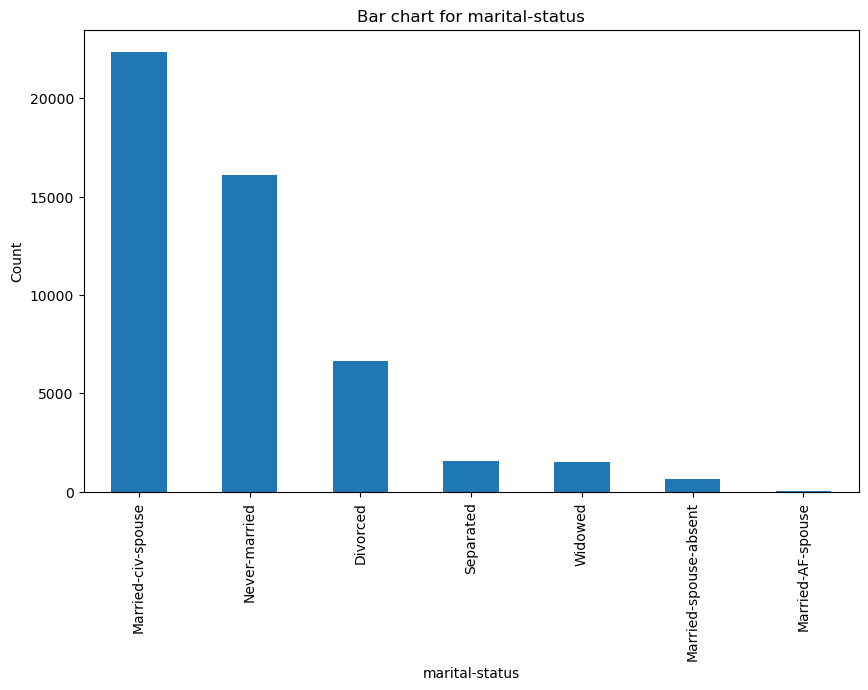

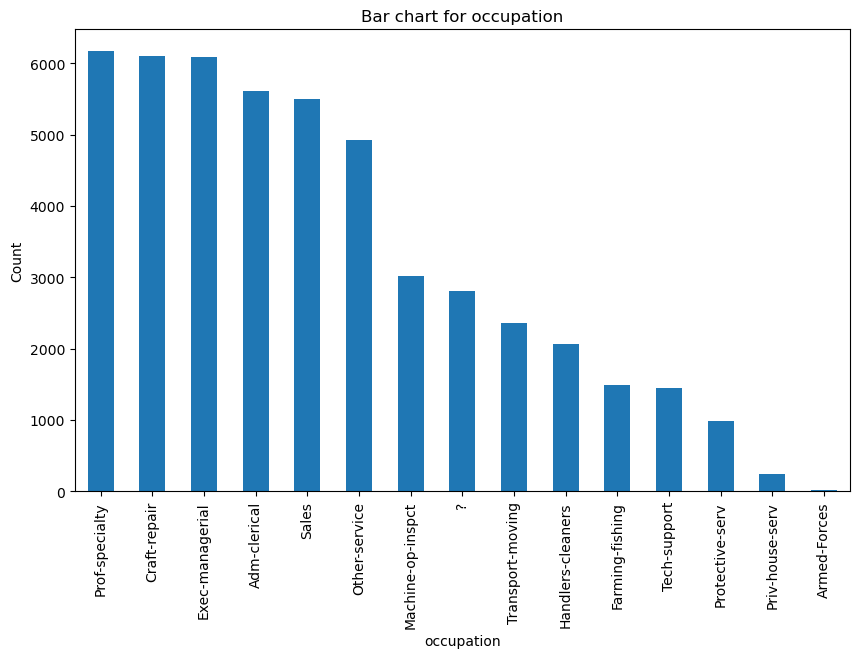

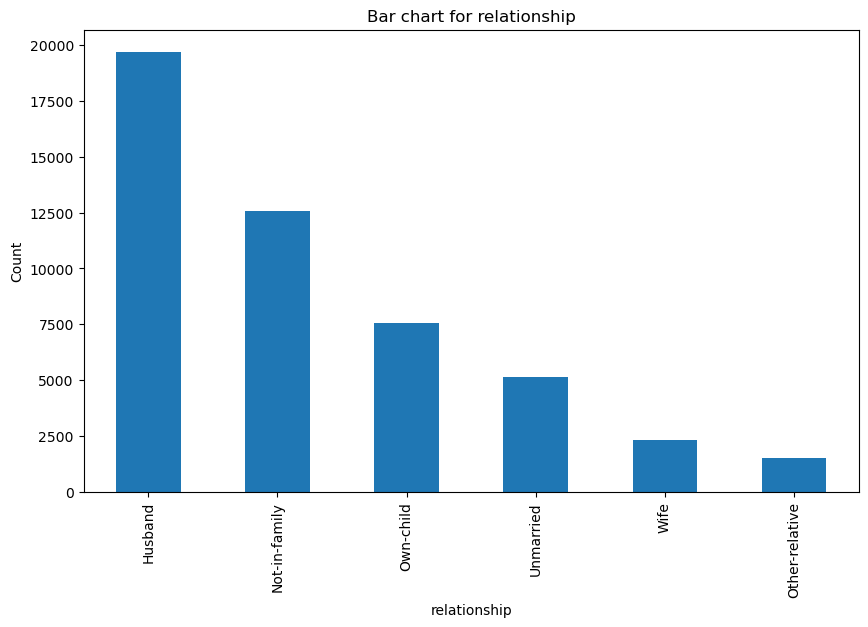

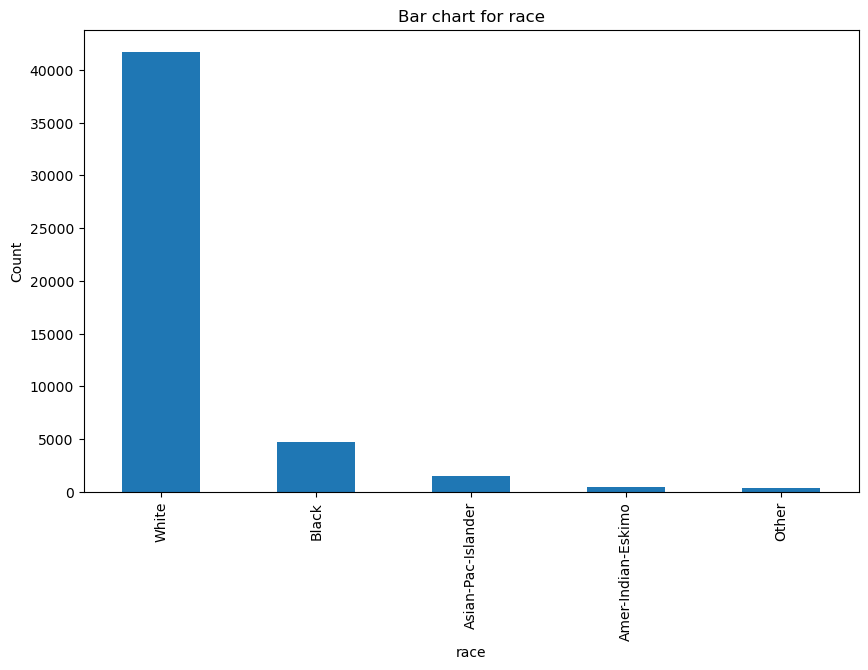

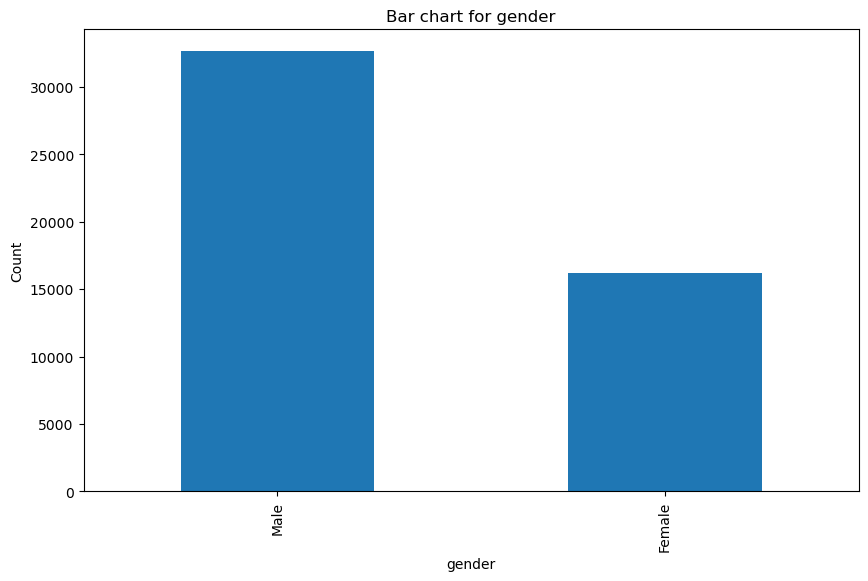

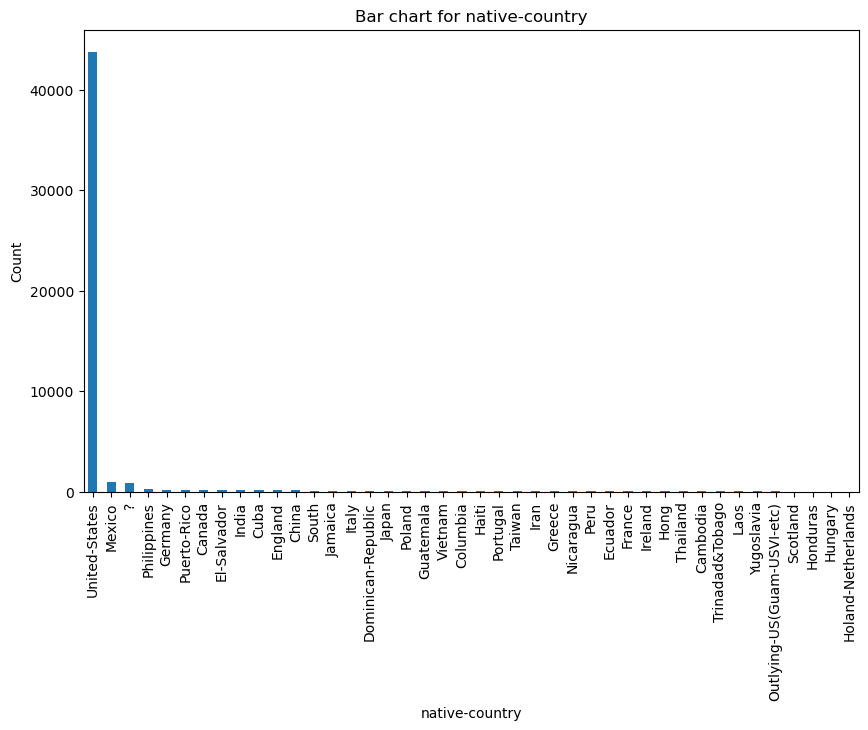

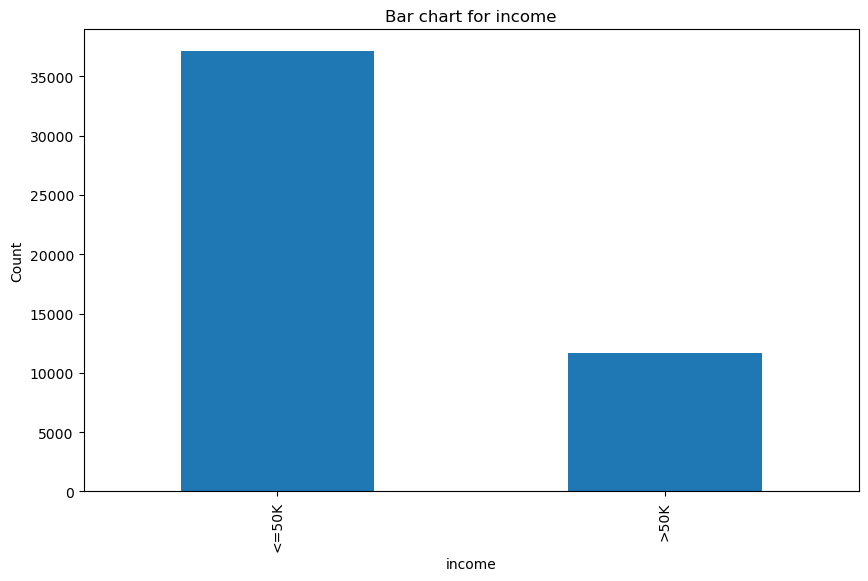

In [429]:
# visualization

for col in df.columns :
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar chart for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

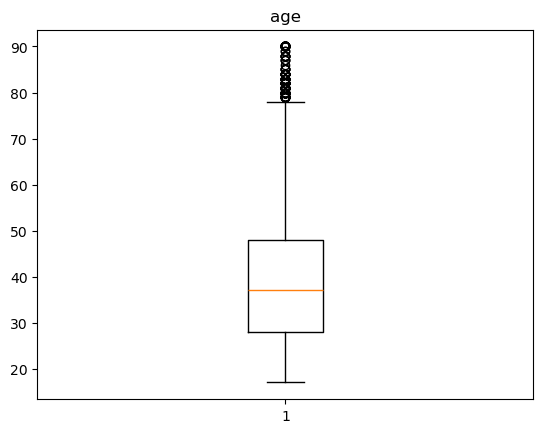

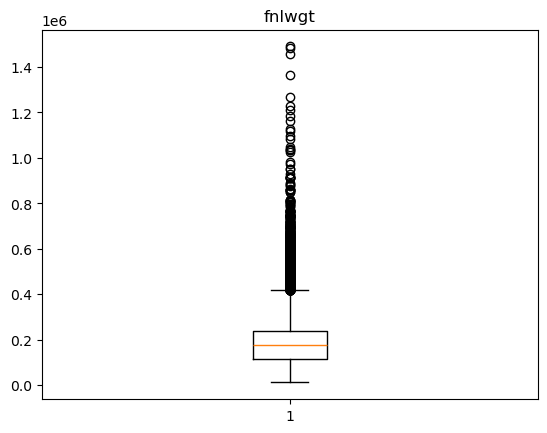

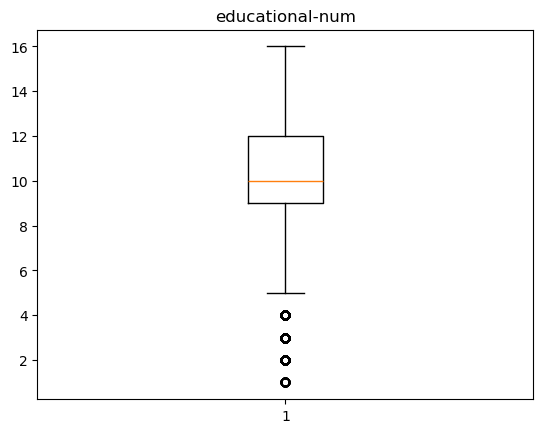

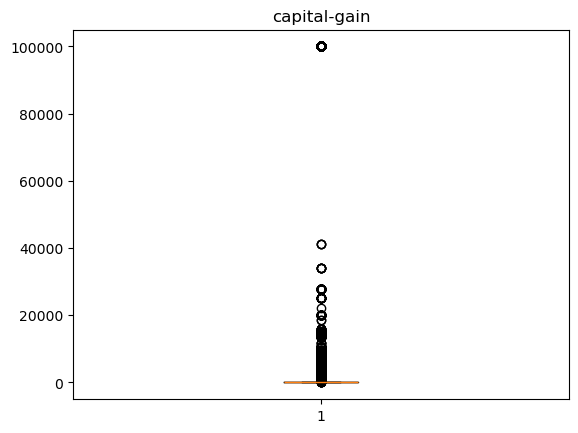

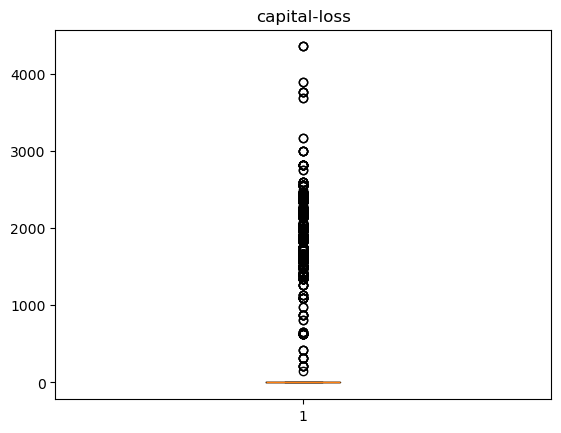

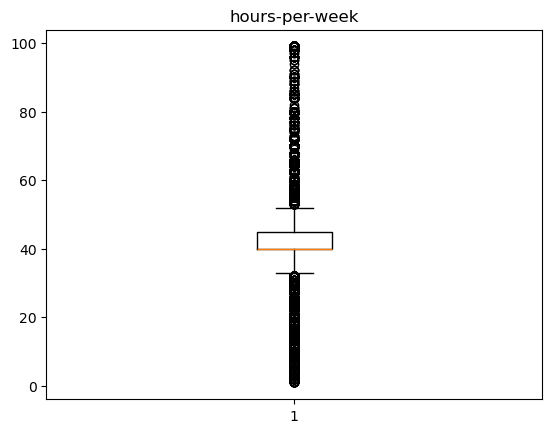

In [431]:
# checking outliers

for col in df.columns :
    if df[col].dtype != 'object' :
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

In [433]:
# removing outliers

for col in df.columns:
        if df[col].dtype != 'object':  # Check if column is numerical
            # Calculate the first (25th percentile) and third (75th percentile) quartiles
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1  # Interquartile range
            
            # Calculate the lower and upper bounds for outliers
            LL = Q1 - 1.5 * IQR
            UL = Q3 + 1.5 * IQR
            
            # Filter out the rows where the value is outside the bounds for each column
            df = df[(df[col] >= LL) & (df[col] <= UL)]


In [435]:
df.shape

(28523, 15)

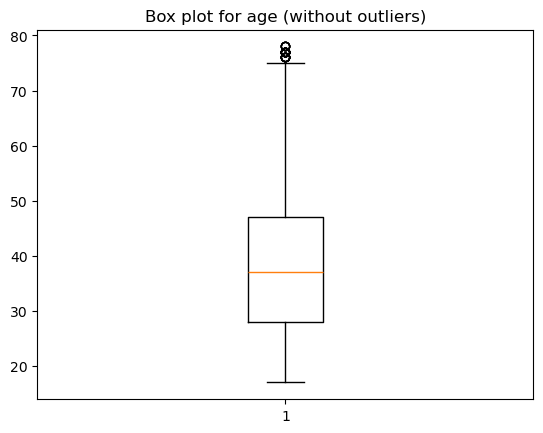

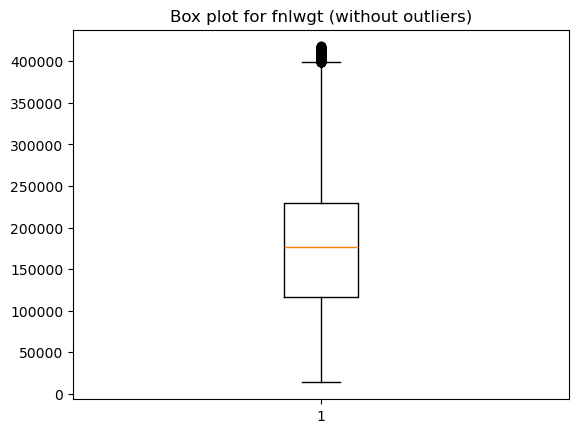

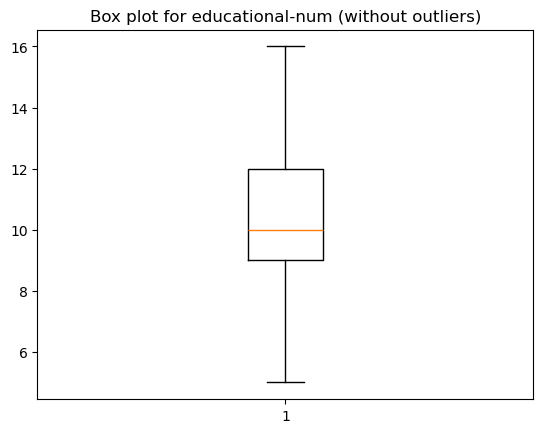

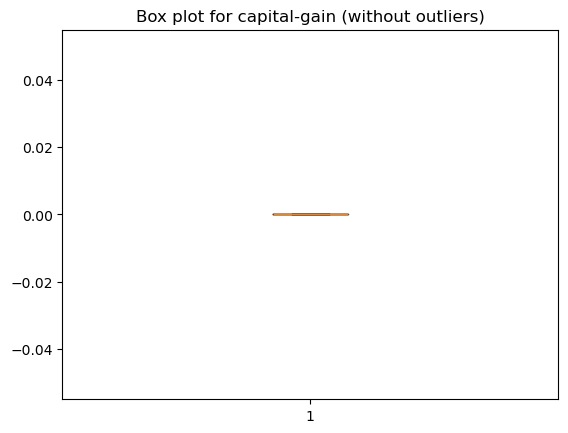

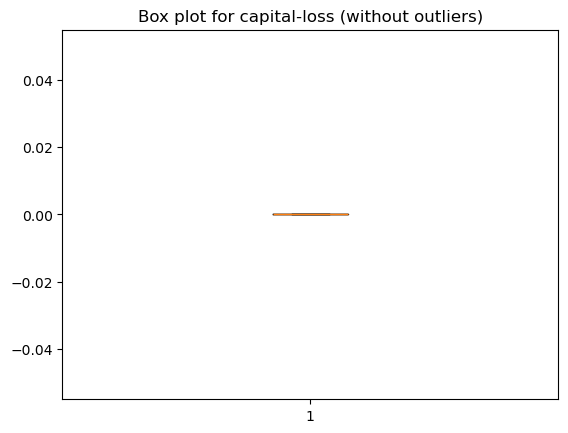

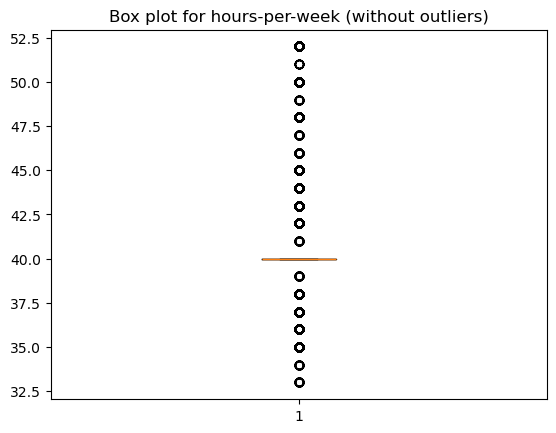

In [437]:
# after removing outliers

for col in df.columns:
    if df[col].dtype != 'object':  # Check if column is numerical
        plt.boxplot(df[col])
        plt.title(f'Box plot for {col} (without outliers)')
        plt.show()

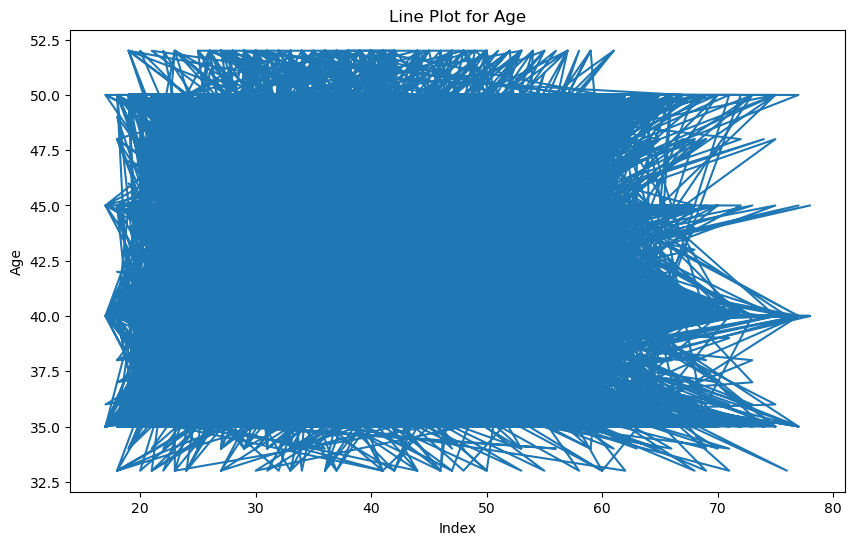

In [483]:
# line plot

plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['hours-per-week'])
plt.title('Line Plot for Age')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19284\2648136573.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df['native-country'],y=df['hours-per-week'] , data=df, color='red' , palette='coolwarm' , kde= False)  # if kde = true (shows line) , if false(no line)


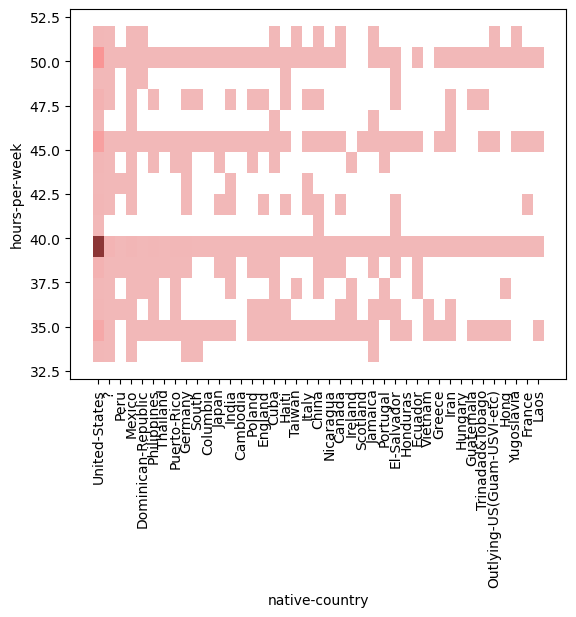

In [487]:
sns.histplot(x=df['native-country'],y=df['hours-per-week'] , data=df, color='red' , palette='coolwarm' , kde= False)  # if kde = true (shows line) , if false(no line)
plt.xticks(rotation = 90)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19284\2157393049.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df['education'], y=df['age'], data=df, color='red' , palette='coolwarm')


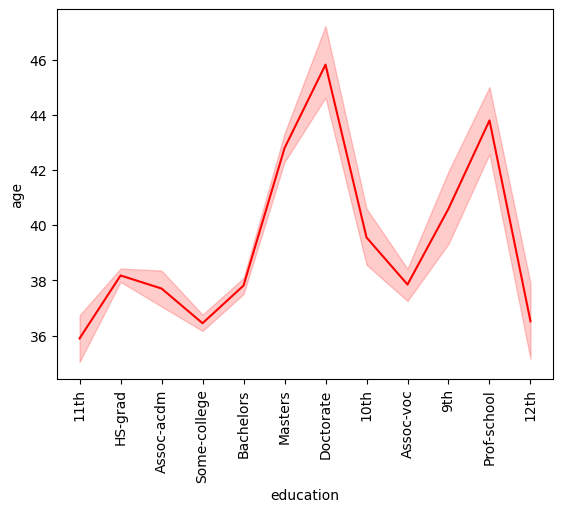

In [459]:
sns.lineplot(x=df['education'], y=df['age'], data=df, color='red' , palette='coolwarm')
plt.xticks(rotation = 90)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19284\2318946282.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['education'], y=df['age'], data=df, palette='coolwarm')


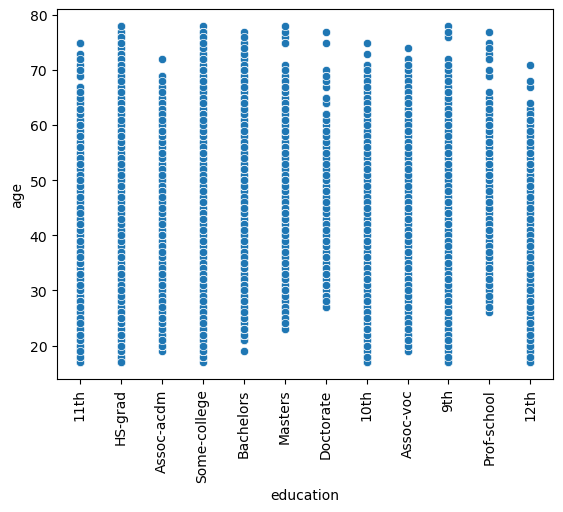

In [463]:
sns.scatterplot(x=df['education'], y=df['age'], data=df, palette='coolwarm')
plt.xticks(rotation = 90)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19284\2567688648.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['education'], y=df['age'], data=df, color='red' , palette='coolwarm')


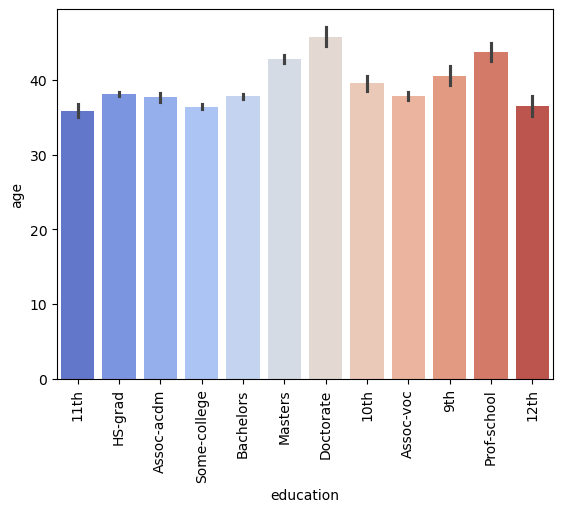

In [465]:
sns.barplot(x=df['education'], y=df['age'], data=df, color='red' , palette='coolwarm')
plt.xticks(rotation = 90)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19284\1709906612.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['education'],  data=df, color='red' , palette='coolwarm')


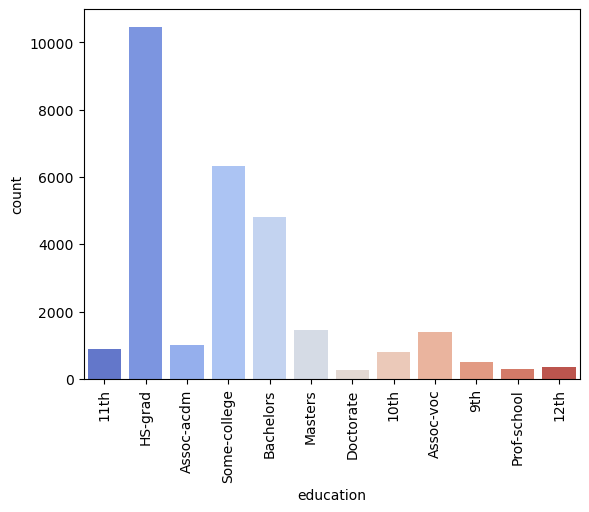

In [467]:
sns.countplot(x=df['education'],  data=df, color='red' , palette='coolwarm')
plt.xticks(rotation = 90)
plt.show()

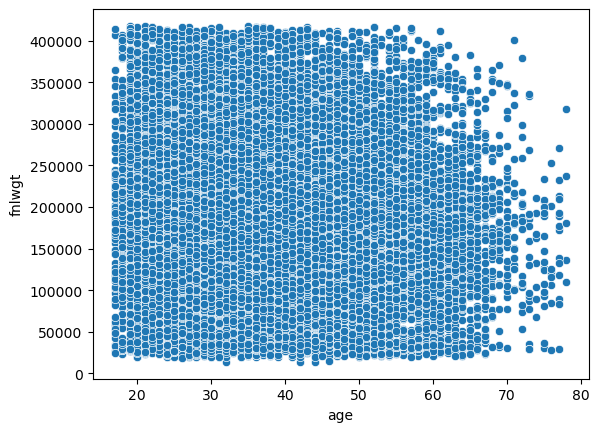

In [475]:
sns.scatterplot(data=df, x=df['age'], y=df['fnlwgt'] )
plt.show()

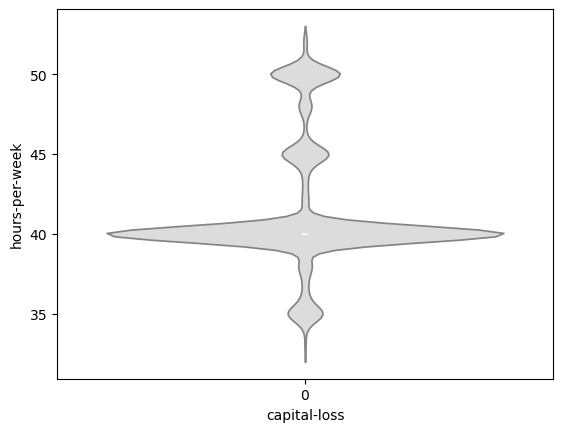

In [479]:
sns.violinplot(data=df, x=df['capital-loss'], y=df['hours-per-week'], palette='coolwarm' , hue=df['capital-gain'], saturation=0.75, legend=False)
plt.show()

In [489]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [501]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['gender'] = le.fit_transform(df['gender'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28523 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              28523 non-null  int64
 1   workclass        28523 non-null  int64
 2   fnlwgt           28523 non-null  int64
 3   education        28523 non-null  int64
 4   educational-num  28523 non-null  int64
 5   marital-status   28523 non-null  int64
 6   occupation       28523 non-null  int64
 7   relationship     28523 non-null  int64
 8   race             28523 non-null  int64
 9   gender           28523 non-null  int32
 10  capital-gain     28523 non-null  int64
 11  capital-loss     28523 non-null  int64
 12  hours-per-week   28523 non-null  int64
 13  native-country   28523 non-null  int64
 14  income           28523 non-null  int64
dtypes: int32(1), int64(14)
memory usage: 3.4 MB


In [505]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [507]:
X = df.drop(columns=['income']) #features
y = df['income']  #target

In [513]:
# linear regression

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19966, 14), (8557, 14), (19966,), (8557,))

In [515]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [517]:
y_pred = model.predict(X_test)
y_pred[:5] , y_test[:5]

(array([0.21509264, 0.40080518, 0.23649382, 0.54003294, 0.27907804]),
 33347    0
 1997     0
 14006    0
 25680    1
 48149    0
 Name: income, dtype: int64)

In [519]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test, y_pred))

0.3626077522550803

In [525]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19966, 14), (8557, 14), (19966,), (8557,))

In [529]:
log_model = LogisticRegression()
log_model.fit(X_train , y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [531]:
y_pred = log_model.predict(X_test)


In [533]:
from sklearn.metrics import confusion_matrix , accuracy_score


In [535]:
confusion_matrix(y_test,y_pred) , accuracy_score(y_test , y_pred)

(array([[6466,  344],
        [1362,  385]], dtype=int64),
 0.8006310622881851)

In [543]:
(6466+385) / (6466+1362+385+344)

0.8006310622881851

In [545]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=0)

In [547]:
my_tree = DecisionTreeClassifier()

my_tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [549]:
y_pred = my_tree.predict(X_test)

In [551]:
from sklearn.metrics import confusion_matrix , accuracy_score


In [553]:
confusion_matrix(y_test,y_pred) 

array([[5815,  995],
       [ 912,  835]], dtype=int64)

In [555]:
(5815+835) / (5815+995+912+835)

0.7771415215612949

In [557]:
accuracy_score(y_test , y_pred)

0.7771415215612949

In [559]:
# random forest

from sklearn.ensemble import RandomForestClassifier

In [571]:
rf = RandomForestClassifier()

rf.fit(X_train , y_train)

RandomForestClassifier()

In [573]:
rf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [575]:
confusion_matrix(y_test,y_pred) 

array([[5815,  995],
       [ 912,  835]], dtype=int64)

In [567]:
(5815+835) / (5815+995+912+835)

0.7771415215612949

In [577]:
accuracy_score(y_test , y_pred)

0.7771415215612949

In [585]:
# accuracy score of logistic regression (BEST MODEL)
0.8006310622881851

# accuracy score of decision tree 
0.7771415215612949

# accuracy score of random forest
0.7771415215612949

0.7771415215612949